# Unit 6 - What's the Weather Like?

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a simple Python library, the OpenWeatherMap API, and a little common sense to create a representative model of weather across world cities.
Your objective is to build a series of scatter plots to showcase the following relationships:
* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

In [61]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time
from citipy import citipy
from pprint import pprint
from config import api_key

In [62]:
# import coordinates
coordinates = pd.read_excel('lat_long_generator.xlsx', sheetname='Sheet1', header=None)
coordinates = coordinates.rename(columns={0:'Latitude', 1:'Longitude'})


In [63]:
# find closest city
coordinates["City"] = ""

for index,row in coordinates.iterrows():
    city = citipy.nearest_city(row["Latitude"],row["Longitude"])
    coordinates.set_value(index,"City",city.city_name)
coordinates.shape

(2500, 3)

In [64]:
# Look for duplicates and remove when found
sort_dupes = coordinates.sort_values('City', ascending=False)
city_subset = sort_dupes.drop_duplicates('City', keep='first').sort_index()


In [66]:
# Save config information and define variables
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Counter
row_count = 0

for index,row in city_subset.iterrows():
    time.sleep(1) 
    city = row["City"]
    query_url = f"{url}appid={api_key}&q={city}&units={units}"
    print("Now retrieving city number " + str(row_count))
    city_wx_response = requests.get(query_url)
    city_wx = city_wx_response.json()
#     city_list.set_value(index,"Latitude",city_wx.get("coord",{}).get("lat"))
#     city_list.set_value(index,"Longitude",city_wx.get("coord",{}).get("lon"))
    city_subset.set_value(index,"Temperature",city_wx.get("main",{}).get("temp_max"))
    city_subset.set_value(index,"Humidity",city_wx.get("main",{}).get("humidity"))
    city_subset.set_value(index,"Cloudiness",city_wx.get("clouds",{}).get("all"))
    city_subset.set_value(index,"Wind speed",city_wx.get("wind",{}).get("speed"))
    
    row_count += 1



Now retrieving city number 0
Now retrieving city number 1
Now retrieving city number 2
Now retrieving city number 3
Now retrieving city number 4
Now retrieving city number 5
Now retrieving city number 6
Now retrieving city number 7
Now retrieving city number 8
Now retrieving city number 9
Now retrieving city number 10
Now retrieving city number 11
Now retrieving city number 12
Now retrieving city number 13
Now retrieving city number 14
Now retrieving city number 15
Now retrieving city number 16
Now retrieving city number 17
Now retrieving city number 18
Now retrieving city number 19
Now retrieving city number 20
Now retrieving city number 21
Now retrieving city number 22
Now retrieving city number 23
Now retrieving city number 24
Now retrieving city number 25
Now retrieving city number 26
Now retrieving city number 27
Now retrieving city number 28
Now retrieving city number 29
Now retrieving city number 30
Now retrieving city number 31
Now retrieving city number 32
Now retrieving city 

Now retrieving city number 268
Now retrieving city number 269
Now retrieving city number 270
Now retrieving city number 271
Now retrieving city number 272
Now retrieving city number 273
Now retrieving city number 274
Now retrieving city number 275
Now retrieving city number 276
Now retrieving city number 277
Now retrieving city number 278
Now retrieving city number 279
Now retrieving city number 280
Now retrieving city number 281
Now retrieving city number 282
Now retrieving city number 283
Now retrieving city number 284
Now retrieving city number 285
Now retrieving city number 286
Now retrieving city number 287
Now retrieving city number 288
Now retrieving city number 289
Now retrieving city number 290
Now retrieving city number 291
Now retrieving city number 292
Now retrieving city number 293
Now retrieving city number 294
Now retrieving city number 295
Now retrieving city number 296
Now retrieving city number 297
Now retrieving city number 298
Now retrieving city number 299
Now retr

Now retrieving city number 533
Now retrieving city number 534
Now retrieving city number 535
Now retrieving city number 536
Now retrieving city number 537
Now retrieving city number 538
Now retrieving city number 539
Now retrieving city number 540
Now retrieving city number 541
Now retrieving city number 542
Now retrieving city number 543
Now retrieving city number 544
Now retrieving city number 545
Now retrieving city number 546
Now retrieving city number 547
Now retrieving city number 548
Now retrieving city number 549
Now retrieving city number 550
Now retrieving city number 551
Now retrieving city number 552
Now retrieving city number 553
Now retrieving city number 554
Now retrieving city number 555
Now retrieving city number 556
Now retrieving city number 557
Now retrieving city number 558
Now retrieving city number 559
Now retrieving city number 560
Now retrieving city number 561
Now retrieving city number 562
Now retrieving city number 563
Now retrieving city number 564
Now retr

Now retrieving city number 798
Now retrieving city number 799
Now retrieving city number 800
Now retrieving city number 801
Now retrieving city number 802
Now retrieving city number 803
Now retrieving city number 804
Now retrieving city number 805
Now retrieving city number 806
Now retrieving city number 807
Now retrieving city number 808
Now retrieving city number 809
Now retrieving city number 810
Now retrieving city number 811
Now retrieving city number 812
Now retrieving city number 813
Now retrieving city number 814
Now retrieving city number 815
Now retrieving city number 816
Now retrieving city number 817
Now retrieving city number 818
Now retrieving city number 819
Now retrieving city number 820
Now retrieving city number 821
Now retrieving city number 822
Now retrieving city number 823
Now retrieving city number 824
Now retrieving city number 825
Now retrieving city number 826
Now retrieving city number 827
Now retrieving city number 828
Now retrieving city number 829
Now retr

In [70]:
# drop cities with NaN and send to CSV
city_final = city_subset.dropna(how='any')
city_final = city_final.sample(500)

city_final.to_csv("City_Weather_Data.csv")

## Plot Temperature (F) vs Latitude

In [71]:
city_final.head()

,Latitude,Longitude,City,Temperature,Humidity,Cloudiness,Wind speed
637,34.035414,33.661888,dromolaxia,59.00,100.0,0.0,3.36
2066,-3.858680,147.788914,lorengau,79.78,100.0,80.0,13.24
2371,-17.865832,56.517800,cap malheureux,78.80,88.0,75.0,10.29
1315,-19.287240,-55.048264,rio verde de mato grosso,75.32,83.0,8.0,4.18
1097,-7.444075,153.003706,panguna,80.59,89.0,36.0,3.62


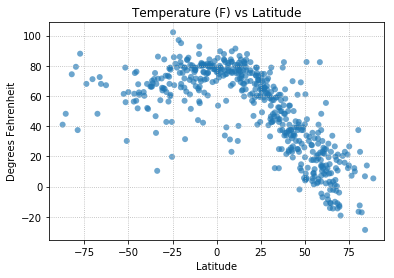

In [84]:
# Build a scatter plot for each data type
plt.scatter(city_final["Latitude"], city_final["Temperature"], edgecolor="none", linewidths=0.5, marker="o", alpha=0.65)
# Incorporate the other graph properties
plt.title("Temperature (F) vs Latitude")
plt.ylabel("Degrees Fehrenheit")
plt.xlabel("Latitude")
plt.grid(linestyle='dotted')
plt.xlim([-95, 95])

# Save the figure
plt.savefig("TempvsLat.png")

plt.show()

## Plot Humidity (%) vs Latitude

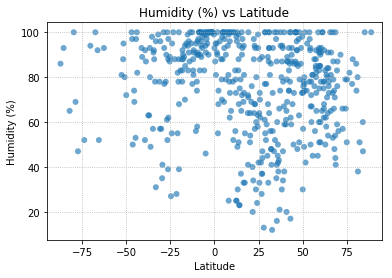

In [86]:
# Build a scatter plot for each data type
plt.scatter(city_final["Latitude"], city_final["Humidity"], edgecolor="none", linewidths=0.5, marker="o", alpha=0.65)
# Incorporate the other graph properties
plt.title("Humidity (%) vs Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(linestyle='dotted')
plt.xlim([-95, 95])

# Save the figure
plt.savefig("HumidityvsLat.png")

plt.show()

## Cloudiness (%) vs Latitude

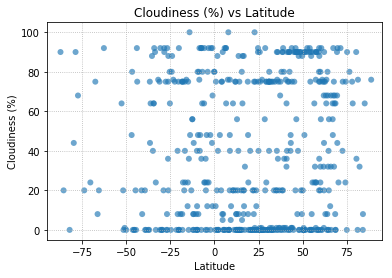

In [87]:
# Build a scatter plot for each data type
plt.scatter(city_final["Latitude"], city_final["Cloudiness"], edgecolor="none", linewidths=0.5, marker="o", alpha=0.65)
# Incorporate the other graph properties
plt.title("Cloudiness (%) vs Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(linestyle='dotted')
plt.xlim([-95, 95])

# Save the figure
plt.savefig("CloudsvsLat.png")

plt.show()

## Windspeed (mph) vs Latitude

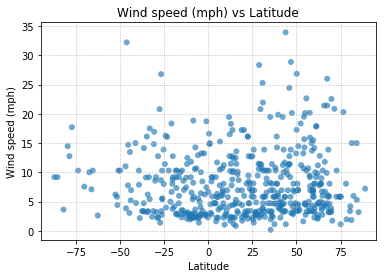

In [88]:
# Build a scatter plot for each data type
plt.scatter(city_final["Latitude"], city_final["Wind speed"], edgecolor="none", linewidths=0.5, marker="o", alpha=0.65)
# Incorporate the other graph properties
plt.title("Wind speed (mph) vs Latitude")
plt.ylabel("Wind speed (mph)")
plt.xlabel("Latitude")
plt.grid(linestyle='dotted')
plt.xlim([-95, 95])

# Save the figure
plt.savefig("WindvsLat.png")

plt.show()